<a href="https://colab.research.google.com/github/Frediwincode/Machine-Learning/blob/main/Hyperparameter%20Optimization_Fredie%20Jin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download the Data
Keep this if you are working in Google Colab. Delete this if you are working on your own computer and have the data downloaded already.

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3' -O lendingclub.csv

--2025-03-01 03:55:07--  https://docs.google.com/uc?export=download&id=0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3
Resolving docs.google.com (docs.google.com)... 209.85.200.101, 209.85.200.138, 209.85.200.139, ...
Connecting to docs.google.com (docs.google.com)|209.85.200.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3&export=download [following]
--2025-03-01 03:55:07--  https://drive.usercontent.google.com/download?id=0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 209.85.145.132, 2607:f8b0:4001:c1e::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|209.85.145.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6325329 (6.0M) [application/octet-stream]
Saving to: ‘lendingclub.csv’

lendingclub.csv     

# **Homework 2**
For last assignment, you trained a machine learning classifier to predict borrower success rates on LendingClub.com, using a set of features that were already present in the dataset. This week you will spend time optimizing that model.

Feel free to reuse code from your first homework submission; this does not need to be done from scratch.



# **Question 1**

Choose **TWO** of the following three options:

   - Option 1: The `state` column is currently broken into 51 distinct values. Create a new feature, `region`, that groups similar states together.
   - Option 2: The `emp_length` column is currently a nominal value. Create a new feature, `emp_length_numeric`, that treats the variable as a numeric value instead.
   - Option 3: The `title` column is a free-form string and is currently hard or impossible to use as a feature. Define one or more features that capture information about the type of loan being applied for, based on the contents of the title.

For the options you have chosen, compare how switching to your new feature in a decision tree model improves or worsens performance compared to using the original representation. Report your quantitative results along with an explanation of your new feature's possible values.

### Preprocessing (The Base Model is also produced there)

In [ ]:
## Preparation Before Training
from google.colab import drive
drive.mount('/content/drive')
%pushd "/content/drive/MyDrive/MSSP6080/assignment 2"

#Step 1: Import packages


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Step 2: Read CSV file

df = pd.read_csv("lendingclub.csv")

# Step 3: Inspect the data
print(df.head())
print(df.info())


# Step 4: Inspect columns
print(df.columns)

# Step 5: Inspect data types
print(df.dtypes)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MSSP6080/assignment 2
    amount      date                    title   fico    dti    zip state  \
0   2500.0  Dec-2011                     bike  740.0   1.00  309xx    GA   
1  12000.0  Dec-2011            Consolidation  675.0  10.78  913xx    CA   
2  21000.0  Dec-2011             Debt Cleanup  705.0  13.22  335xx    FL   
3  31825.0  Dec-2011  Debt Consolidation Loan  760.0  14.03  080xx    NJ   
4  12000.0  Dec-2011       Debt Consolidation  725.0  16.70  088xx    NJ   

  emp_length  policy_code  year outcome  
0   < 1 year          1.0  2011  accept  
1  10+ years          1.0  2011  accept  
2  10+ years          1.0  2011  accept  
3    5 years          1.0  2011  accept  
4  10+ years          1.0  2011  accept  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81103 entries, 0 to 81102
Data columns (total 11 columns):
 #   Col

In [ ]:
## Build Model of Decision Tree
#https://www.datacamp.com/community/tutorials/decision-tree-classification-python

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Since we need to compare different options, we should copy df each time to avoid the revision on the original dataset.
df_0 = df.copy()

#Define the data to be used
X0 = df_0.loc[:, ["amount", "fico", "dti"]]
y0 = df_0.policy_code

#Split the data into testing and training groups, with 30% designated as test data
X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, y0, test_size=0.3, random_state=1, stratify=y0)

#let’s go with 30% in test data;
#set random_state=1;
#stratify by the y variable—this ensures the distribution of y is equal in both train/test.

# Set decision tree classifier
Model_Base = DecisionTreeClassifier()
Model_Base.fit(X_train0, y_train0)
#Don't forget to fit the model

DecisionTreeClassifier()

[[20788   769]
 [  800  1974]]
Accuracy: 0.940
Precision: 0.720
Recall: 0.710
Specificity: 0.960
F1 Score: 0.710
Confusion Matrix:


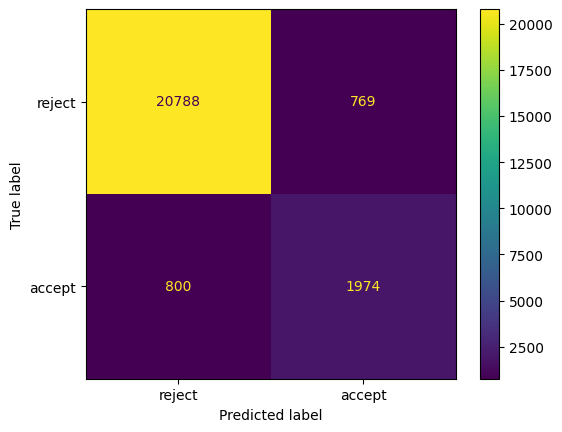

In [ ]:
##Make the predictions and place the outcomes

# Prediction
y_pred0 = Model_Base.predict(X_test0)

# Generate 5 metrics: Accuracy, Precision, Recall, Specificity, F1 Score; of course with Confusion Matrix as the starting point

#Provide a labeled confusion matrix.
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

#Import packages
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Create the confusion matrix, which makes it easier to create other metrics
cm0 = confusion_matrix(y_test0, y_pred0)
print(cm0)
#Plot the confusion matrix with smart look
disp_cm0 = ConfusionMatrixDisplay(confusion_matrix=cm0, display_labels=["reject", "accept"])
disp_cm0.plot()

#Just as what we do when calculating the metrics by hand, we do the same naming the tp/tn/fp/fn
tp0 = cm0[1, 1]
tn0 = cm0[0, 0]
fn0 = cm0[1, 0]
fp0 = cm0[0, 1]

#The calculation of accuracy, precision, recall, specificity and F1 score
accuracy0 = round((tp0+tn0)/(tp0+fp0+tn0+fn0), ndigits=2)
precision0 = round(tp0/(tp0+fp0), ndigits=2)
recall0 = round(tp0/(tp0+fn0), ndigits=2)
specificity0 = round(tn0/(tn0+fp0), ndigits=2)

f1_0 = round(2 * (precision0 * recall0) / (precision0 + recall0), ndigits=2)
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

# Print the outcome
print(f"Accuracy: {accuracy0:.3f}")
print(f"Precision: {precision0:.3f}")
print(f"Recall: {recall0:.3f}")
print(f"Specificity: {specificity0:.3f}")
print(f"F1 Score: {f1_0:.3f}")
print("Confusion Matrix:")
print(disp_cm0)

##**Option One**

Here, I'm gonna deal with regional data, dividing them into 5 geographical areas based on: https://www.ars.usda.gov/people-locations/find-a-location/, including Midwest Area, Northeast Area, Pacific West Area, Plains Area, Southeast Area.


### **Source Code**

In [ ]:
#Step 1: Divide states into 5 regions based on the website.
midwest = ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'OH', 'WI']
northeast = ['CT', 'ME', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']
pacific_west = ['AK', 'CA', 'HI', 'OR', 'WA']
plains = ['CO', 'ID', 'MT', 'NV', 'NM', 'ND', 'SD', 'UT', 'WY']
southeast = ['AL', 'AR', 'DC', 'DE', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV']

#Since we need to compare different options, we should copy df each time to avoid the revision on the original dataset.
df_1 = df.copy()

#Step 2: Assign the states into the region lists.
region = []
for i in np.arange(len(df_1.state)):
    if df_1.iloc[i, 6] in midwest:
        region.append("midwest")
    elif df_1.iloc[i, 6] in northeast:
        region.append("northeast")
    elif df_1.iloc[i, 6] in pacific_west:
        region.append("pacific west")
    elif df_1.iloc[i, 6] in southeast:
        region.append("southeast")
    elif df_1.iloc[i, 6] in plains:
        region.append("plains")
    else:
        region.append("NA")
    #Since there are NA values, we need to add this condition.


df_1["region"] = region

df_1.head()

,amount,date,title,fico,dti,zip,state,emp_length,policy_code,year,outcome,region
0,2500.0,Dec-2011,bike,740.0,1.00,309xx,GA,< 1 year,1.0,2011,accept,southeast
1,12000.0,Dec-2011,Consolidation,675.0,10.78,913xx,CA,10+ years,1.0,2011,accept,pacific west
2,21000.0,Dec-2011,Debt Cleanup,705.0,13.22,335xx,FL,10+ years,1.0,2011,accept,southeast
3,31825.0,Dec-2011,Debt Consolidation Loan,760.0,14.03,080xx,NJ,5 years,1.0,2011,accept,northeast
4,12000.0,Dec-2011,Debt Consolidation,725.0,16.70,088xx,NJ,10+ years,1.0,2011,accept,northeast


In [ ]:
#Step 3: Create dummy variables for each row and merge the dummy variables to main dataframe

#Split nominal value of region into binary dummy variables
#https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

# Create a column only for regions
region_options = df_1.region.unique()
regions_df1 = pd.DataFrame(region_options, columns=['region'])

# Generate dummy variables using get_dummies
dum_df1 = pd.get_dummies(regions_df1, columns=["region"], prefix=["Region_is"] )

#Get the data type of the generated dummies
print(dum_df1.dtypes)

# Since the dummies are in bool types, we need to transform them into int "0/1" for future calculation
dum_df1 = dum_df1.astype(int)


# Merge to create a dataframe with regions and corresponding dummy variable values
regions_df1 = regions_df1.join(dum_df1)

regions_df1.head()

Region_is_NA              bool
Region_is_midwest         bool
Region_is_northeast       bool
Region_is_pacific west    bool
Region_is_plains          bool
Region_is_southeast       bool
dtype: object


,region,Region_is_NA,Region_is_midwest,Region_is_northeast,Region_is_pacific west,Region_is_plains,Region_is_southeast
0,southeast,0,0,0,0,0,1
1,pacific west,0,0,0,1,0,0
2,northeast,0,0,1,0,0,0
3,midwest,0,1,0,0,0,0
4,NA,1,0,0,0,0,0


In [ ]:
#Step 4: Re-run decision tree with the 3 variables (amount, fico, dti) and add the new region related indicator variable.

# Confirm dummy variable values were assigned correctly by regions.

# Confirm dummy variable were assigned correctly by regions
print(df_1[["region"]].head())
# Confirm dummy variable values were assigned correctly by regions
print(df_1.groupby("region").mean(numeric_only=True))
#(Don't forget that we could only calculate the numeric data~)


# Select our lovely labels including the new 9 region labels, with 8 variables in total
df_1 = pd.get_dummies(df_1, columns=["region"], prefix="region")
X1 = df_1[["amount", "fico", "dti"] + list(df_1.columns[df_1.columns.str.startswith("region_is")])]
y1 = df_1["policy_code"]


# Build the new model. Same way same method
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, stratify=y1, random_state=1)

# Set decision tree classifier to have maximum depth of 10 via max_depth=10
Model_rev1 = DecisionTreeClassifier(max_depth=10)
Model_rev1.fit(X_train1, y_train1)
#Don't forget to fit the new model

         region
0     southeast
1  pacific west
2     southeast
3     northeast
4     northeast
                    amount        fico         dti  policy_code         year
region                                                                      
NA            13201.893561  606.492428  282.207000     0.107855  2011.101645
midwest       12727.092054  604.894997  410.890376     0.097769  2011.055433
northeast     13068.668493  610.096375  431.956566     0.122877  2011.090277
pacific west  13604.755259  614.365876  576.928643     0.143160  2011.117323
plains        13269.909955  612.613557  262.886323     0.121811  2011.121561
southeast     12462.340756  586.535722  733.040045     0.099649  2011.107404


DecisionTreeClassifier(max_depth=10)

[[20398  1159]
 [ 1063  1711]]
Accuracy: 0.910
Precision: 0.600
Recall: 0.620
Specificity: 0.950
F1 Score: 0.610
Confusion Matrix:


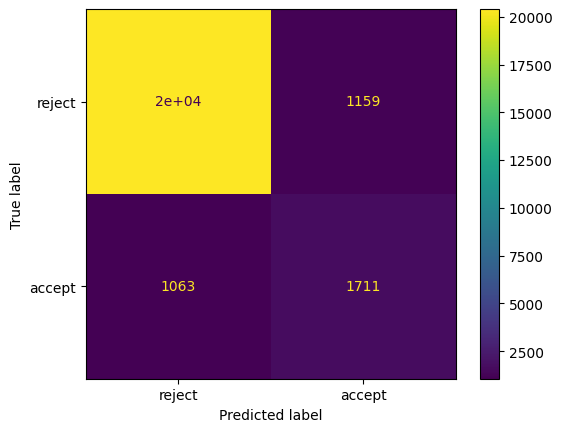

In [ ]:
#Step 5: Make the predictions and place the outcomes

# Prediction
y_pred1 = Model_rev1.predict(X_test1)

# Generate 5 metrics: Accuracy, Precision, Recall, F1 Score, Confusion Matrix

#Provide a labeled confusion matrix.
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

#Import packages
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Create the confusion matrix, which makes it easier to create other metrics
cm1 = confusion_matrix(y_test1, y_pred1)
print(cm1)
#Plot the confusion matrix with smart look
disp_cm1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=["reject", "accept"])
disp_cm1.plot()

#Just as what we do when calculating the metrics by hand, we do the same naming the tp/tn/fp/fn
tp1 = cm1[1, 1]
tn1 = cm1[0, 0]
fn1 = cm1[1, 0]
fp1 = cm1[0, 1]

#The calculation of accuracy, precision, recall, specificity and F1 score
accuracy1 = round((tp1+tn1)/(tp1+fp1+tn1+fn1), ndigits=2)
precision1 = round(tp1/(tp1+fp1), ndigits=2)
recall1 = round(tp1/(tp1+fn1), ndigits=2)
specificity1 = round(tn1/(tn1+fp1), ndigits=2)

f1_1 = round(2 * (precision1 * recall1) / (precision1 + recall1), ndigits=2)
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

# Print the outcome
print(f"Accuracy: {accuracy1:.3f}")
print(f"Precision: {precision1:.3f}")
print(f"Recall: {recall1:.3f}")
print(f"Specificity: {specificity1:.3f}")
print(f"F1 Score: {f1_1:.3f}")
print("Confusion Matrix:")
print(disp_cm1)

### **Analysis**

Compare how switching to the new feature in a decision tree model improves or worsens performance compared to using the original representation. Report the quantitative results along with an explanation of the new feature's possible values


In this option, I divided the data into 5 geographical areas based on: https://www.ars.usda.gov/people-locations/find-a-location/, including Midwest Area, Northeast Area, Pacific West Area, Plains Area, Southeast Area.

And the results show that:

compared to the performance of assignment 1 key answer, which is:

(1)Accuracy: 0.93
(2)Precision: 0.66
(3)Recall: 0.72
(4)Specificity: 0.95
(5)F1 score: 0.69

The performance of this model is that:

(1)Accuracy: 0.91
(2)Precision: 0.60
(3)Recall: 0.62
(4)Specificity: 0.95
(5)F1 Score: 0.61

Looks like only the metric of specificity remains still, other metrics show reduction, especially the recall and F1 score, which have decreased almost 10%.

I think the reasons for the worse performance could be that:

(1)The divsion of regions is too rough to effectively reflect the data, which might simplify the differences among states like economic situation, leading to the lack of detailed information.

(2)This could also introduce noise since the introduction of variable related to regions creates 6 dummy variables. If the impact of regions is not obvious, the sudden increase of variables might make model learn useless pattern, leading to the decrease of the prediction of whole model.

In this way, the operation to divide the data into 5 regions is not a good idea to improve the peformance of this model since almost all the metrics have not show increase.


##**Option Two**

Here, I'm gonna transform the employment length into a float variable


### **Source Code**

In [ ]:
#Step 1: Transform the employment length into a float variable

#This is easy since I have compledted it last week, and I'll just copy and paste.

#   The data type of the employment length is object, and I need
#   to translate the data into float type used for calculate.

#Since we need to compare different options, we should copy df each time to avoid the revision on the original dataset.
df_2 = df.copy()

df_2['emp_length'] = df_2['emp_length'].replace({"< 1 year": 0})
# working year less than 1 year would be processed as 0
df_2['emp_length'] = df_2['emp_length'].replace({"10+ years": 11})
# working year more than 10 years would be processed as 11

# P.S. When using the code provided by the cheetsheet, I come across the problem
#   that there might be incompatibility between panda versions. Using
#   ":dt['emp_length'].replace("< 1 year", 0, inplace=True", inplace=True would
#   not directly revise the raw data in the dataset, but create a copy of the raw data,
#   and this revision might be invalid for the future panda version.
#   In this way, I tried "replace" code to avoid the incompatibility.

emp_years = []
# create an empty list to store the float-transformed employment length.

for i in np.arange(len(df_2.emp_length)):
    years_string = str(df_2.iloc[i, 7]).split()
    # "str(df.iloc[i, 7]).split()" converts the value into string data type
    #    and splits it by spaces, such as "9 years" becomes ["9", "years"].
    years_float = float(years_string[0])
    # extracts the first element, which is the numeric part.
    emp_years.append(years_float)
    # place the result we process into the list 'emp_years'.

df_2['emp_years'] = emp_years
# store the list into our dataset's new list called the same name as
#   the list 'emp_years' we generated.

In [ ]:
#Step 2: Re-run decision tree with the 3 variables (amount, fico, dti) and add the new float employment length variable.

# Select our lovely labels including the new debt label
X2 = df_2[["amount", "fico", "dti", "emp_years"]]
y2 = df_2["policy_code"]

# Build the new model. Same way same method
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, stratify=y2, random_state=1)

# Set your decision tree classifier to have maximum depth of 10 via max_depth=10
Model_rev2 = DecisionTreeClassifier(max_depth=10)
Model_rev2.fit(X_train2, y_train2)
#Don't forget to fit the new model

DecisionTreeClassifier(max_depth=10)

[[20502  1055]
 [  730  2044]]
Accuracy: 0.930
Precision: 0.660
Recall: 0.740
Specificity: 0.950
F1 Score: 0.700
Confusion Matrix:


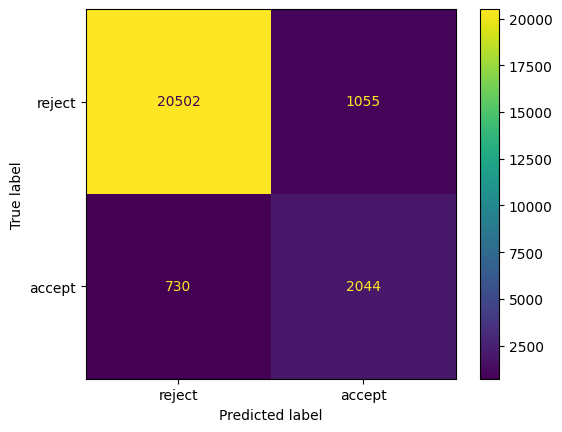

In [ ]:
#Step 3: Make the predictions and place the outcomes

# Prediction
y_pred2 = Model_rev2.predict(X_test2)

# Generate 5 metrics: Accuracy, Precision, Recall, F1 Score, Confusion Matrix

#Provide a labeled confusion matrix.
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

#Import packages
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Create the confusion matrix, which makes it easier to create other metrics
cm2 = confusion_matrix(y_test2, y_pred2)
print(cm2)
#Plot the confusion matrix with smart look
disp_cm2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=["reject", "accept"])
disp_cm2.plot()

#Just as what we do when calculating the metrics by hand, we do the same naming the tp/tn/fp/fn
tp2 = cm2[1, 1]
tn2 = cm2[0, 0]
fn2 = cm2[1, 0]
fp2 = cm2[0, 1]

#The calculation of accuracy, precision, recall, specificity and F1 score
accuracy2 = round((tp2+tn2)/(tp2+fp2+tn2+fn2), ndigits=2)
precision2 = round(tp2/(tp2+fp2), ndigits=2)
recall2 = round(tp2/(tp2+fn2), ndigits=2)
specificity2 = round(tn2/(tn2+fp2), ndigits=2)

f1_2 = round(2 * (precision2 * recall2) / (precision2 + recall2), ndigits=2)
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

# Print the outcome
print(f"Accuracy: {accuracy2:.3f}")
print(f"Precision: {precision2:.3f}")
print(f"Recall: {recall2:.3f}")
print(f"Specificity: {specificity2:.3f}")
print(f"F1 Score: {f1_2:.3f}")
print("Confusion Matrix:")
print(disp_cm2)

### **Analysis**

Compare how switching to your new feature in a decision tree model improves or worsens performance compared to using the original representation. Report your quantitative results along with an explanation of your new feature's possible values.

Here, I transformed the variable of employment length into a float variable.

And the results show that:

compared to the performance of assignment 1 key answer, which is:

(1)Accuracy: 0.93
(2)Precision: 0.66
(3)Recall: 0.72
(4)Specificity: 0.95
(5)F1 score: 0.69

The performance of this model is that:

(1)Accuracy: 0.93
(2)Precision: 0.66
(3)Recall: 0.74
(4)Specificity: 0.95
(5)F1 Score: 0.70

Looks like the model has been improved slightly 🤏, including recall metric has increased 0.02 points, and 0.01 points of F1 score increasement.

I think the reasons for the little improvement could be that:

By converting the employment length variable to floating form, the model could more accurately identify changes in length of working. However, this change might not largely impact on the application approval, so the change of employment length has little impact on overall model performance.

In this way, the operation to change the employment length into float form might be a little bit helpful to improve the peformance of this model, but the effect is limited.

##**Option Three**

1.It appears that a lot of users are requesting loans to restructure/consolidate debt. Thus, I would create a binary variable to distinguish these types of loans from other types.

### **Source Code**

In [ ]:
#Step 1:
#a.Use lowercase version of title because case insensitive;
#b.https://thispointer.com/python-check-if-a-string-contains-a-sub-string-find-its-index-case-insensitive/

#Since we need to compare different options, we should copy df each time to avoid the revision on the original dataset.
df_3 = df.copy()

is_debt_related = []

for i in np.arange(len(df_3.title)):
  if "debt" in df.iloc[i, 2].lower(): #Use lowercase version
    is_debt_related.append(1)
  else:
    is_debt_related.append(0)

df_3["is_debt_related"] = is_debt_related


In [ ]:
#Step 2: Re-run decision tree with the 3 variables (amount, fico, dti) and add the new debt related indicator variable.

# Select our lovely labels including the new debt label
X3 = df_3[["amount", "fico", "dti", "is_debt_related"]]
y3 = df_3["policy_code"]

# Build the new model. Same way same method
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, stratify=y3, random_state=1)

# Set your decision tree classifier to have maximum depth of 10 via max_depth=10
Model_rev3 = DecisionTreeClassifier(max_depth=10)
Model_rev3.fit(X_train3, y_train3)
#Don't forget to fit the new model


DecisionTreeClassifier(max_depth=10)

[[20370  1187]
 [ 1052  1722]]
Accuracy: 0.910
Precision: 0.590
Recall: 0.620
Specificity: 0.940
F1 Score: 0.600
Confusion Matrix:


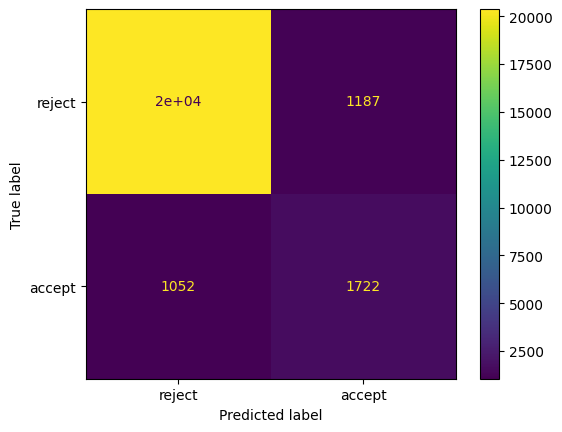

In [ ]:
#Step 3: Make the predictions and place the outcomes

# Prediction
y_pred3 = Model_rev3.predict(X_test3)

# Generate 5 metrics: Accuracy, Precision, Recall, F1 Score, Confusion Matrix

#Provide a labeled confusion matrix.
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

#Import packages
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Create the confusion matrix, which makes it easier to create other metrics
cm3 = confusion_matrix(y_test3, y_pred3)
print(cm3)
#Plot the confusion matrix with smart look
disp_cm3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=["reject", "accept"])
disp_cm3.plot()

#Just as what we do when calculating the metrics by hand, we do the same naming the tp/tn/fp/fn
tp3 = cm3[1, 1]
tn3 = cm3[0, 0]
fn3 = cm3[1, 0]
fp3 = cm3[0, 1]

#The calculation of accuracy, precision, recall, specificity and F1 score
accuracy3 = round((tp3+tn3)/(tp3+fp3+tn3+fn3), ndigits=2)
precision3 = round(tp3/(tp3+fp3), ndigits=2)
recall3 = round(tp3/(tp3+fn3), ndigits=2)
specificity3 = round(tn3/(tn3+fp3), ndigits=2)

f1_3 = round(2 * (precision3 * recall3) / (precision3 + recall3), ndigits=2)
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

# Print the outcome
print(f"Accuracy: {accuracy3:.3f}")
print(f"Precision: {precision3:.3f}")
print(f"Recall: {recall3:.3f}")
print(f"Specificity: {specificity3:.3f}")
print(f"F1 Score: {f1_3:.3f}")
print("Confusion Matrix:")
print(disp_cm3)

###**Analysis**

Compare how switching to the new feature in a decision tree model improves or worsens performance compared to using the original representation. Report the quantitative results along with an explanation of the new feature's possible values


It appears that a lot of users are requesting loans to restructure/consolidate debt. Thus,I created a binary variable to distinguish these types of loans from other types.

And the results show that:

compared to the performance of assignment 1 key answer, which is:

(1)Accuracy: 0.93
(2)Precision: 0.66
(3)Recall: 0.72
(4)Specificity: 0.95
(5)F1 score: 0.69

The performance of this model is that:

(1)Accuracy: 0.91
(2)Precision: 0.59
(3)Recall: 0.62
(4)Specificity: 0.94
(5)F1 Score: 0.60

Looks like only the change has made each value of metric decrease, especially the recall and F1 score, which have decreased almost 10%.

I think the reasons for the decrease could be that:

(1)The change is somewhat similar to option 1 which assigned the state into 6 regions. The bianry classification is too rough to effectively reflect the data, which might simplify the differences among data like detailed debt situation, leading to the lack of complex information.

(2)If most of the users are requesting loans for one category, like restrucration or consolidation, the impact of the classificaiton between the types is limited, even causing noise since the model might learn useless pattern, leading to the decrease of the prediction of whole model.


In this way, the idea of creating a binary variable to distinguish one types of loans from other types is not a good idea to improve the model.

## **Conclusion**

In conclusion, **adding new feature related to regions** and **defining features that capture information about the type of loan** **being applied** would worsen the performance of the model; Adding a new feature related to transforming employment length into float data type helps improve the model a little, but the impact is limited.

# **Question 2**

Choose **THREE** of the following five options:


*   Part 1. Amount of data available for training.
*   Part 2. Subset of features included in the model.
*   Part 3. Decision tree vs. logistic regression classification.
*   Part 4. Hyperparameter tuning for the best-performing model from option
*   Part 5. Number of folds or stratification strategy for cross-validation.

For each option you choose, write code to see how much impact that option has on model performance. For instance, you might choose to measure prediction accuracy as the amount of available data is increased from 1% of the total training set to 100%.

Please ensure that you put textual analysis with each part, and at the end of the question, you conduct a comparative analysis.

Note that for logistic regression classification, the default decision boundary may not produce the best model; you will likely want to check different decision boundaries if you choose options 3 and 4.

Rank the three options you chose from the greatest impact on model performance to the least impact. Justify your ranking, based on specific quantitative experimental evidence.

##**Part 2: Subset of features included in the model**
In this part, I'm gonna use different combination of features for each model, to compare which one performs best.

### **Source Code**

In [ ]:
#Preparation: since I generated each variable in different copied dataset, now I would generate them again for grouping them.

# Copy the original dataset to avoid the direct change on it
df_Q2 = df.copy()


# Step 1: Generate the regions
midwest = ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'OH', 'WI']
northeast = ['CT', 'ME', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']
pacific_west = ['AK', 'CA', 'HI', 'OR', 'WA']
plains = ['CO', 'ID', 'MT', 'NV', 'NM', 'ND', 'SD', 'UT', 'WY']
southeast = ['AL', 'AR', 'DC', 'DE', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV']

region = []
for i in np.arange(len(df_Q2.state)):
    if df_Q2.iloc[i, 6] in midwest:
        region.append("midwest")
    elif df_Q2.iloc[i, 6] in northeast:
        region.append("northeast")
    elif df_Q2.iloc[i, 6] in pacific_west:
        region.append("pacific west")
    elif df_Q2.iloc[i, 6] in southeast:
        region.append("southeast")
    elif df_Q2.iloc[i, 6] in plains:
        region.append("plains")
    else:
        region.append("NA")

df_Q2["region"] = region

# Step 2: Generate dummy variables for the entire dataframe
dum_df_Q2 = pd.get_dummies(df_Q2["region"], prefix="Region_is")

# Convert to int
dum_df_Q2 = dum_df_Q2.astype(int)

# Merge the dummy variables back to df_Q2
df_Q2 = df_Q2.join(dum_df_Q2)




# Step 3: Create is-debt-related
is_debt_related = []

for i in np.arange(len(df_Q2.title)):
    if "debt" in str(df_Q2.iloc[i, 2]).lower():  # Use lowercase version
        is_debt_related.append(1)
    else:
        is_debt_related.append(0)

df_Q2["is_debt_related"] = is_debt_related


# Step 4: Create emp_years
df_Q2['emp_length'] = df_Q2['emp_length'].replace({"< 1 year": 0})
df_Q2['emp_length'] = df_Q2['emp_length'].replace({"10+ years": 11})

emp_years = []
for i in np.arange(len(df_Q2.emp_length)):
    years_string = str(df_Q2.iloc[i, 7]).split()
    years_float = float(years_string[0])
    emp_years.append(years_float)

df_Q2['emp_years'] = emp_years

df_Q2.head()


,amount,date,title,fico,dti,zip,state,emp_length,policy_code,year,outcome,region,Region_is_NA,Region_is_midwest,Region_is_northeast,Region_is_pacific west,Region_is_plains,Region_is_southeast,is_debt_related,emp_years
0,2500.0,Dec-2011,bike,740.0,1.00,309xx,GA,0,1.0,2011,accept,southeast,0,0,0,0,0,1,0,0.0
1,12000.0,Dec-2011,Consolidation,675.0,10.78,913xx,CA,11,1.0,2011,accept,pacific west,0,0,0,1,0,0,0,11.0
2,21000.0,Dec-2011,Debt Cleanup,705.0,13.22,335xx,FL,11,1.0,2011,accept,southeast,0,0,0,0,0,1,1,11.0
3,31825.0,Dec-2011,Debt Consolidation Loan,760.0,14.03,080xx,NJ,5 years,1.0,2011,accept,northeast,0,0,1,0,0,0,1,5.0
4,12000.0,Dec-2011,Debt Consolidation,725.0,16.70,088xx,NJ,11,1.0,2011,accept,northeast,0,0,1,0,0,0,1,11.0


In [ ]:
#Let's define different groups
feature_sets = {
    "Group_1": ["amount", "fico", "dti"],
    # Group 1: only "amount", "fico", "dti"
    "Group_2": ["amount", "fico", "dti", "emp_years"],
    #Group 2: add emp_years to Group 1
    "Group_3": ["amount", "fico", "dti", "emp_years"] + list(df_Q2.columns[df_Q2.columns.str.startswith("Region_is")]),
    #Group 3: add region to Group 2
    "Group_4": ["amount", "fico", "dti", "emp_years"] + list(df_Q2.columns[df_Q2.columns.str.startswith("Region_is")]) + ["is_debt_related"]
}
    #Group 4: add is-debt-related to Group 3


In [ ]:
#Let's train the models and give metrics

# Firstly, I need to define a function for automatic calculation of metrics.
  #you know what? the sequence is really important!
  #since this is a range, we need to think clearly about the sequnce before, in and after the range!

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


def calculate_metrics_Q22(y_true, y_pred):
    cmQ22 = confusion_matrix(y_true, y_pred)
    tnQ22, fpQ22, fnQ22, tpQ22 = cmQ22.ravel()
    # remember to ravel the confusion matrix!
    accQ22 = round(accuracy_score(y_true, y_pred), 3)
    #Yeah, since there is too much work, I use the xx_score to help me calculate! :)
    precisionQ22 = round(precision_score(y_true, y_pred), 3)
    recallQ22 = round(recall_score(y_true, y_pred), 3)
    f1Q22 = round(f1_score(y_true, y_pred), 3)
    specificityQ22 = round(tnQ22 / (tnQ22 + fpQ22), 3) if (tnQ22 + fpQ22) > 0 else 0
    return [accQ22, precisionQ22, recallQ22, specificityQ22, f1Q22]

# Set an empty list to store the results!
results_dict_Q22 = {}

# Range feature sets to train the models and give metrics
for Group_name, features in feature_sets.items():
    XQ22 = df_Q2[features]
    yQ22 = df_Q2["policy_code"]

    XQ22_train, XQ22_test, yQ22_train, yQ22_test = train_test_split(XQ22, yQ22, test_size=0.3, random_state=1, stratify=yQ22)

    clf_Q22 = DecisionTreeClassifier(max_depth=10)
    clf_Q22.fit(XQ22_train, yQ22_train)

    yQ22_pred = clf_Q22.predict(XQ22_test)

    #Here we are to calculate matrics
    results_dict_Q22[Group_name] = calculate_metrics_Q22(yQ22_test, yQ22_pred)

# Present data using table where I provide all 5 metrics on rows and combination of variables selected as columns
results_df_Q22 = pd.DataFrame(results_dict_Q22, index=["Accuracy_Q22", "Precision_Q22", "Recall_Q22", "Specificity_Q22", "F1_Score_Q22"])

print(results_df_Q22)


                 Group_1  Group_2  Group_3  Group_4
Accuracy_Q22       0.909    0.927    0.926    0.924
Precision_Q22      0.597    0.659    0.659    0.645
Recall_Q22         0.618    0.737    0.734    0.740
Specificity_Q22    0.946    0.951    0.951    0.948
F1_Score_Q22       0.607    0.696    0.694    0.689


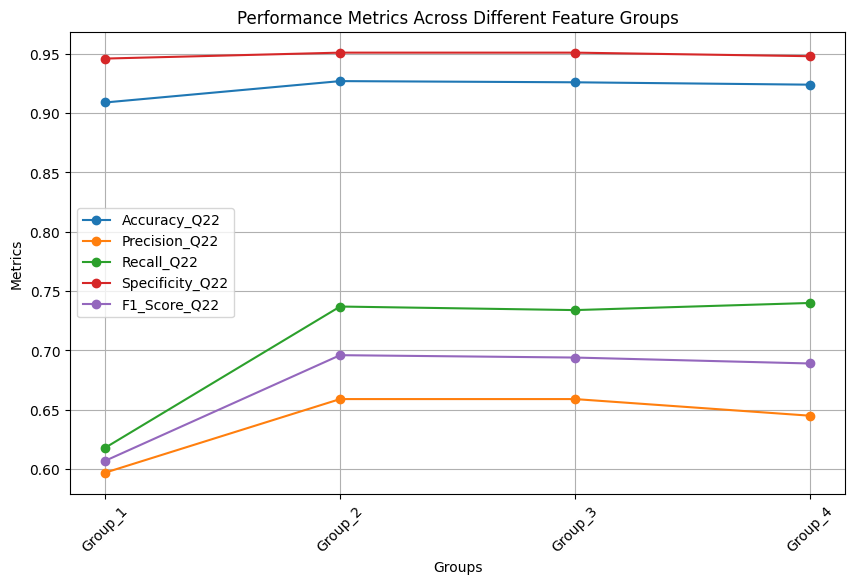

In [ ]:
#Let's visualize the results

import matplotlib.pyplot as plt

# get the information of the plot
metrics = results_df_Q22.index
groups = results_df_Q22.columns

# draw the line plot
plt.figure(figsize=(10, 6))
for metric in metrics:
    plt.plot(groups, results_df_Q22.loc[metric], marker='o', label=metric)

plt.xlabel("Groups")
plt.ylabel("Metrics")
plt.title("Performance Metrics Across Different Feature Groups")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
#Show the plot
plt.show()


###**Analysis**

Write a thoughtful explanation how the changes in the analysis compares. For example, for part 1, examining how changing the training data size impacts your model performance.


In this part, I used different combination of features for each model, to compare which one performs best.

The combinations are listed as followed:

(1)Group 1: "amount", "fico", "dti";

(2)"Group_2": "amount", "fico", "dti", "emp_years";

(3)"Group_3": "amount", "fico", "dti", "emp_years", "Region_is";

(4)"Group_4": "amount", "fico", "dti", "emp_years", "is_debt_related"



And the results are showed below:

![](https://drive.google.com/uc?export=view&id=1S0No3XeJ41P9i7gYT9OXASTkVoW-QXdj)






![](https://drive.google.com/uc?export=view&id=1tntxo1N_0JhQlK_VdQKG2_q-beYVZqI-)


As you can see, the four feature groups were sequentially added employment length, regional variable, and the binary variable of whether debt is for restructuring or consolidating, to observe their impact on the model's performance.

The results show that adding the Group 2 which combining amount, fico, dti and employment years results in the best comprehensive performance improvement.

Specifically, recall increased from 0.617 to 0.736, and F1 score increases from 0.607 to 0.695, indicating that working length does have important impact on predicting loan approval.

In contrast, the inclusion of region-related variable(Group 3) shows little change in model performance, suggesting that regional factors have a limited effect on prediction.

For Group 4 adding debt-related variable, recall slightly increased, but precision decreased, which means that this variable might make more false positive happening inside the model, causing some unapproved loans to be predicted as approved. However, the overall effect is more limited.

In conclusion, the best feature combination is Group 2 - 'amount', 'fico', 'dti', 'emp_years', since it has the most significant improvement in recall and F1 Score, which is the best balance for the performance of the model.

##**Part 3: Decision tree versus Logistic Regression**

In this part, I'm gonna run two different models: Decision tree vs. logistic regression classification, to compare which one performs better.

### **Source Code**

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Step 1: Preparation before training

#We need to first copy the dataset, since I do not want to destroy the dataset
df_Q23 = df_Q2.copy()

#Let's define the varibles to be used
features_Q23 = ["amount", "fico", "dti", "emp_years"]
XQ23 = df_Q23[features_Q23]
yQ23 = df_Q23["policy_code"]

# Step 2: Now it's time to train our model: Decision tree versus Logistic Regression

#This is the part for decision tree
XQ23_train, XQ23_test, yQ23_train, yQ23_test = train_test_split(XQ23, yQ23, test_size=0.3, random_state=1, stratify=yQ23)

clf_tree_Q23 = DecisionTreeClassifier(max_depth=10)
clf_tree_Q23.fit(XQ23_train, yQ23_train)
yQ23_pred_tree = clf_tree_Q23.predict(XQ23_test)



                 Boundaries 0.4  Boundaries 0.5  Boundaries 0.6
Accuracy_Q23              0.893           0.894           0.892
Precision_Q23             0.538           0.561           0.576
Recall_Q23                0.432           0.318           0.209
Specificity_Q23           0.952           0.968           0.980
F1_Score_Q23              0.479           0.406           0.307


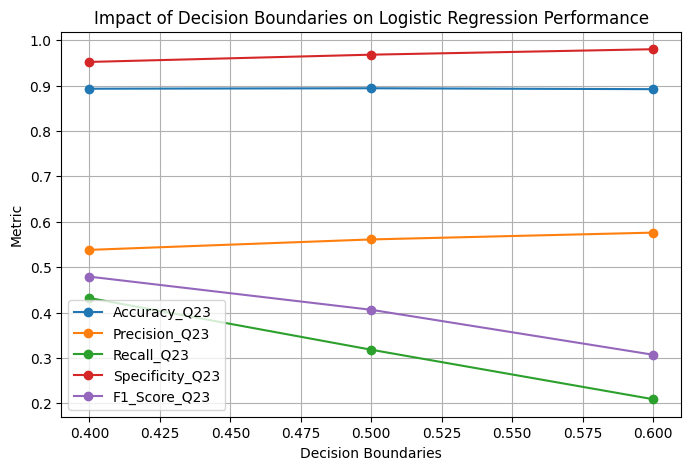

In [ ]:
#This is the part for logistic regression

##Note that for logistic regression classification, the default decision boundary may not
##produce the best model; So I would check different decision boundaries


# Here's the basic model of logistic regression
clf_logre_Q23 = LogisticRegression(max_iter=1000, random_state=1)
clf_logre_Q23.fit(XQ23_train, yQ23_train)

# Here, I would only retrive the apporved applications to test which model of decision boundaries performs best
# otherwise, it would be too complex!
yQ23_prob_logre = clf_logre_Q23.predict_proba(XQ23_test)[:, 1]


# Try different decision boundaries
boundaries0 = [0.4, 0.5, 0.6]

# Define metrics to calculate the performance of different models with different decision boundaries
def calculate_metrics_Q23(y_true, y_prob, boundary):
    y_pred = (y_prob >= boundary).astype(int)
    #This could make calculate for each model with different boundaries
    cmQ23 = confusion_matrix(y_true, y_pred)
    tnQ23, fpQ23, fnQ23, tpQ23 = cmQ23.ravel()
    accQ23 = round(accuracy_score(y_true, y_pred), 3)
    precisionQ23 = round(precision_score(y_true, y_pred), 3)
    recallQ23 = round(recall_score(y_true, y_pred), 3)
    f1Q23 = round(f1_score(y_true, y_pred), 3)
    specificityQ23 = round(tnQ23 / (tnQ23 + fpQ23), 3) if (tnQ23 + fpQ23) > 0 else 0
    return [accQ23, precisionQ23, recallQ23, specificityQ23, f1Q23]

# Calculate metrics of different models
results_dict_Q23 = {f"Boundaries {b}": calculate_metrics_Q23(yQ23_test, yQ23_prob_logre, b) for b in boundaries0}

# Print results
results_df_Q23 = pd.DataFrame(results_dict_Q23, index=["Accuracy_Q23", "Precision_Q23", "Recall_Q23", "Specificity_Q23", "F1_Score_Q23"])
print(results_df_Q23)

# Visualize the metrics
plt.figure(figsize=(8, 5))
for metric in results_df_Q23.index:
    plt.plot(boundaries0, results_df_Q23.loc[metric], marker='o', label=metric)
    #Still need to range every model

plt.xlabel("Decision Boundaries")
plt.ylabel("Metric")
plt.title("Impact of Decision Boundaries on Logistic Regression Performance")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Step 3: Compare the two models around 5 metrics
#As what I have done before, I would still use function and metric_score to calculate the metrics.

#First, let's define the function as usual.
def calculate_metrics_Q23(y_true, y_pred):
    cmQ23 = confusion_matrix(y_true, y_pred)
    tnQ23, fpQ23, fnQ23, tpQ23 = cmQ23.ravel()

    accQ23 = round(accuracy_score(y_true, y_pred), 3)
    precisionQ23 = round(precision_score(y_true, y_pred), 3)
    recallQ23 = round(recall_score(y_true, y_pred), 3)
    f1Q23 = round(f1_score(y_true, y_pred), 3)
    specificityQ23 = round(tnQ23 / (tnQ23 + fpQ23), 3) if (tnQ23 + fpQ23) > 0 else 0

    return [accQ23, precisionQ23, recallQ23, specificityQ23, f1Q23]

#Now, let's calculate the metrics.
metrics_tree_Q23 = calculate_metrics_Q23(yQ23_test, yQ23_pred_tree)

#Calculate metrics for logistic regression with different decision boundaries
boundaries = [0.4, 0.5, 0.6]
logre_results = {}
#to store the results of models with different decsion boundaries

for bound in boundaries:
    yQ23_pred_logre_bound = (yQ23_prob_logre >= bound).astype(int)
    logre_results[f"LogReg (Boundaries {bound})"] = calculate_metrics_Q23(yQ23_test, yQ23_pred_logre_bound)

# Here's the results
results_df_Q23 = pd.DataFrame({
    "Decision Tree": metrics_tree_Q23,
    **logre_results
}, index=["Accuracy_Q23", "Precision_Q23", "Recall_Q23", "Specificity_Q23", "F1_Score_Q23"])

print(results_df_Q23)


                 Decision Tree  LogReg (Boundaries 0.4)  \
Accuracy_Q23             0.927                    0.893   
Precision_Q23            0.659                    0.538   
Recall_Q23               0.737                    0.432   
Specificity_Q23          0.951                    0.952   
F1_Score_Q23             0.696                    0.479   

                 LogReg (Boundaries 0.5)  LogReg (Boundaries 0.6)  
Accuracy_Q23                       0.894                    0.892  
Precision_Q23                      0.561                    0.576  
Recall_Q23                         0.318                    0.209  
Specificity_Q23                    0.968                    0.980  
F1_Score_Q23                       0.406                    0.307  


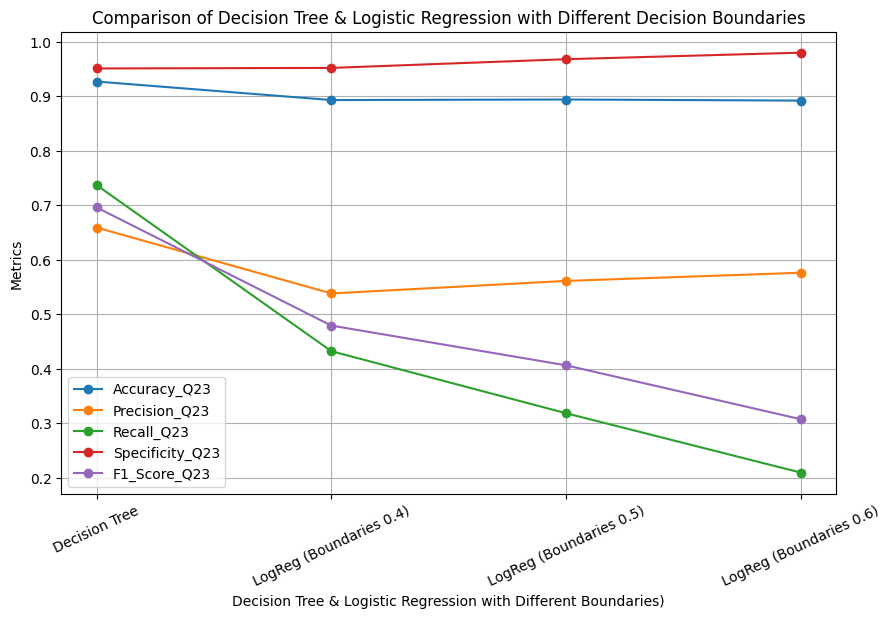

In [ ]:
# Step 4. Visualize with the plot
plt.figure(figsize=(10, 6))

for metric in results_df_Q23.index:
    plt.plot(results_df_Q23.columns, results_df_Q23.loc[metric], marker='o', label=metric)

plt.xlabel("Decision Tree & Logistic Regression with Different Boundaries)")
plt.ylabel("Metrics")
plt.title("Comparison of Decision Tree & Logistic Regression with Different Decision Boundaries")
plt.xticks(rotation=25)
#A little bit inclination would make it look nicer!
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


###**Analysis**

Write a thoughtful explanation how the changes in the analysis compares. For example, for part 1, examining how changing the training data size impacts your model performance.


In this part, I try logistic regression and decision tree, to compare which one performs best.

Since different decision boundaries might have impact on logistic regression, so apart from comparing solely on logistic regression and decision tree, I also compare the performance of logistic regression with different dicision boundaries.


And the results are showed below:

![](https://drive.google.com/uc?export=view&id=1n4LescmsJsJVRcftWA8wjEFR2DZmK1H6)

![](https://drive.google.com/uc?export=view&id=1IjUOP3CNyXUwKwfTHuz_Z6FEkQQ8XtMf)



For logistic regression, the model with deicision boundary of 0.4 is the most balance。 Specifically, the recall (0.432) is significantly higher than that of 0.5 (0.318) and 0.6 (0.209), which means that the model could better identify approved application. Also, although the accuracy rate (0.538) is slightly lower than that of 0.6 (0.576), it is nota big deal compared to recall, since it still remains within a more reasonable range. In addition, the F1 Score of 0.479 at 0.4 is significantly higher than that of 0.5 (0.406) and 0.6 (0.307), indicating a better balance between precision and recall.

But of course, the decision tree model is better than logistic regression, even for the latter with deicision boundary of 0.4, mainly due to higher recall rates (0.737 versus 0.432) and F1 scores (0.696 versus 0.479), indicating that it is more effective in identifying approved applicarion while maintaining a better accuracy in total(0.659 vs. 0.538). Although specificity of logistic regression with 0.4 boundary (0.952) is slightly higher than decision trees (0.951), decision trees are better at balancing everything overall, making it the better choice.

##**Part 4: Hyperparameter tuning for the best-performing model from option 3**
In this part, I'm gonna make hyperparameter tuning for the best-performing model from option 3, which is the decison tree model.

### **Source Code**

In [ ]:
from sklearn.model_selection import GridSearchCV
#This is the first time I've ever used GridSearchCV, so interesting!

# Step 1: Preparation before training

#we need to first copy the dataset, since I do not want to destroy the dataset
df_Q24 = df_Q2.copy()

#Define variables
features_Q24 = ["amount", "fico", "dti", "emp_years"]
XQ24 = df_Q24[features_Q24]
yQ24 = df_Q24["policy_code"]

#Still train our decision tree model
XQ24_train, XQ24_test, yQ24_train, yQ24_test = train_test_split(XQ24, yQ24, test_size=0.3, random_state=1, stratify=yQ24)
#The best model presented was the decision tree using 70% training data
#and the subset of features ["amount", "fico", "dti", "emp_years"].⬆️

# Step 2: Place the model without hyperparameter tuning
tree_Q24_notune = DecisionTreeClassifier()
tree_Q24_notune.fit(XQ24_train, yQ24_train)
yQ24_pred_tree_notune = tree_Q24_notune.predict(XQ24_test)



In [ ]:
# Step 3. Place the model with hyperparameter tuning

##Now it's time to define parameter grid
param_grid_Q24 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(3, 10),
    'min_samples_split': range(2, 6),
    'min_samples_leaf': range(1, 4)
}

##Use parameter grid to make tuning
clf_tree_Q24 = DecisionTreeClassifier()
###The basic model
param_grid_Q24 = {
    'criterion': ['gini', 'entropy'], ### the criterion
    'max_depth': range(3, 10),  ### tree depth from 3 to 9
    'min_samples_split': range(2, 6),  ### minimum samples needed to split a node
    'min_samples_leaf': range(1, 4)  ### minimum samples required in a leaf node
}
gs_Q24 = GridSearchCV(clf_tree_Q24, param_grid=param_grid_Q24, cv=10, verbose=1, n_jobs=-1)

gs_Q24.fit(XQ24_train, yQ24_train)
### don't forget to fit the model


#store the best hyperparameter combination found by GSCV
best_params_Q24 = gs_Q24.best_params_

#Now, it's time to create a new dicision tree with the best hyperparameter combination
clf_tree_Q24_tuned = DecisionTreeClassifier(**best_params_Q24)
clf_tree_Q24_tuned.fit(XQ24_train, yQ24_train)
yQ24_pred_tree_tuned = clf_tree_Q24_tuned.predict(XQ24_test)


Fitting 10 folds for each of 168 candidates, totalling 1680 fits


In [ ]:
# Step 4. Let's make metrics to evaluate the models

#First, let's define the function for metrics as always
def calculate_metrics_Q24(y_true, y_pred):
    cmQ24 = confusion_matrix(y_true, y_pred)
    tnQ24, fpQ24, fnQ24, tpQ24 = cmQ24.ravel()

    accQ24 = round(accuracy_score(y_true, y_pred), 3)
    precisionQ24 = round(precision_score(y_true, y_pred), 3)
    recallQ24 = round(recall_score(y_true, y_pred), 3)
    f1Q24 = round(f1_score(y_true, y_pred), 3)
    specificityQ24 = round(tnQ24 / (tnQ24 + fpQ24), 3) if (tnQ24 + fpQ24) > 0 else 0

    return [accQ24, precisionQ24, recallQ24, specificityQ24, f1Q24]

#Calculate the metrics for two models
metrics_tree_Q24_notune = calculate_metrics_Q24(yQ24_test, yQ24_pred_tree_notune)
metrics_tree_Q24_tuned = calculate_metrics_Q24(yQ24_test, yQ24_pred_tree_tuned)

#Show the results
results_df_Q24 = pd.DataFrame({
    "Decision Tree (Without tuning)": metrics_tree_Q24_notune,
    "Decision Tree (Tuned)": metrics_tree_Q24_tuned
}, index=["Accuracy_Q24", "Precision_Q24", "Recall_Q24", "Specificity_Q24", "F1_Score_Q24"])

#Print results
print("Decision Tree (No-tuned vs. Tuned)")
print(results_df_Q24)

#Moreover, I would like to know what the best hyperparameters look like
print("Best hyperparameters:", best_params_Q24)


Decision Tree (No-tuned vs. Tuned)
                 Decision Tree (Without tuning)  Decision Tree (Tuned)
Accuracy_Q24                              0.946                  0.926
Precision_Q24                             0.771                  0.666
Recall_Q24                                0.748                  0.705
Specificity_Q24                           0.971                  0.954
F1_Score_Q24                              0.759                  0.685
Best hyperparameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 4}


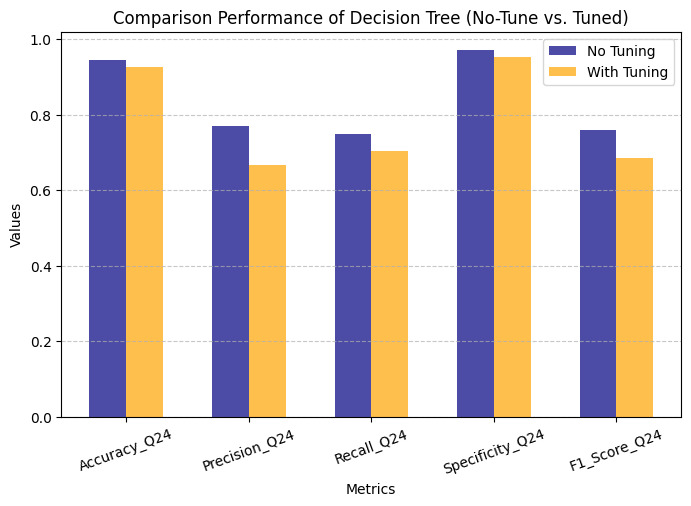

In [ ]:
#OK, finally comes to visualize the results!


# Get the results
metrics = results_df_Q24.index
no_tune_values = results_df_Q24["Decision Tree (Without tuning)"]
tuned_values = results_df_Q24["Decision Tree (Tuned)"]

# Setting for plots
x = np.arange(len(metrics))
width = 0.3
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width/2, no_tune_values, width, label="No Tuning", color='navy', alpha=0.7)
ax.bar(x + width/2, tuned_values, width, label="With Tuning", color='orange', alpha=0.7)


ax.set_xlabel("Metrics")
ax.set_ylabel("Values")
ax.set_title("Comparison Performance of Decision Tree (No-Tune vs. Tuned)")
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=20)
#I have tried several times, and find that the 20 degree could make it look nicer without lacking information
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

#Print the plot
plt.show()


###**Analysis**
Write a thoughtful explanation how the changes in the analysis compares. For example, for part 1, examining how changing the training data size impacts your model performance.


In this part, I make hyperparameter tuning for the best model in the part 3, which is the decision tree.


And the results are showed below:

![](https://drive.google.com/uc?export=view&id=1A9Ug0Afi7aMIuTj6--DNEE1buaWJKDr_)


![](https://drive.google.com/uc?export=view&id=1h35xH4xFg3KHgJLbMCPp0HbpLFCdYLd-)


It is clear that the model without tuning is better than the one with heperparameters tuning.

Specifically, precision, recall and F1 score decreased significantly, from 0.768 to 0.666, 0.742 to 0.707 and 0.754 to 0.686, respectively. In addition, Accuracy and Specificity also decreased slightly. This means that the model is might be less likely to distinguish between approved and unapproved applications.

To sum up, this hyperparameter tuning does not result in better performance of the model.


##**Comparative Analysis**



*Ok! Finally we have arrived there!!!*

After comparing so MANY models, **the decision tree model with feature combination (dti, fico, amount, emp_years) without tuning hyperparameters** has the best performance. Specifically, it has the accuracy (0.946), precision (0.771), recall (0.748), specificity (0.971) and F1 score (0.759), performing better than the model with hyperparameter tuning, which has decreased in almost every metrics.

Also, adding additional features, including regional variables or loan types, has little impact on the model and may even introduce noise, causing some matrics to decline.

Making logistic regression is the most useless way to improve performance. Even if 0.4 is selected as the decision boundary, the accuracy rate of the model is only 0.893, the recall rate drops to 0.432, and the F1 score is only 0.479. The overall performance is much worse than the decision tree.


Therefore, in terms of the adjustment, I give this ranking for the model performance: decision tree with feature group (dti, fico, amount, emp_years) without tuning hyperparameters > add additional features > tuning hyperparameters > logistic regression transformation.

# **Question 3**

Report the best-performing model and the total set of choices that you made in the options above to get to that level of performance. Compare that model performance to the result you reported in Homework 1.

   - Describe one hypothetical business context for LendingClub where the amount of improvement reported in Question 3 would be worth the extra time and effort needed for optimization.
   - Describe one hypothetical business context where the improvement would **not** have been worth the extra time and effort.

The best-performing model is a decision tree model with features including "amount", "fico", "dti", "emp_years" without hyperparameter tuning, with 70% on training dataset.

 The performance metrics of this model are: accuracy 0.946,precision 0.771, recall 0.748, specificity 0.971, F1 score 0.759, compared with the results of Assignment 1 (Accuracy 0.93, precision 0.66, recall 0.72, specificity 0.95, F1 Score 0.69).

 Since 88.60% of the data belonged to the negative class, a jump in accuracy from 0.93 to 0.946 could slightly benefit reducing misclassifications.

 Other metrics also improved, (1) with precision increased from 0.66 to 0.771. This indicates the model could better identify the true approved applications among all the predicted-approved applications. (2) The recall rate increased from 0.72 to 0.748, indicating the model could better identify the true approved applications among all the actually approved applications. (3)Specificity increased from 0.954 to 0.971, indicating that the model could better identify the truly unapproved applications among all the rejected applications. (4)F1 score increased from 0.69 to 0.759, indicating that the model could better balance between avoiding taking unapproved applications as approved and ignoring the truly approved applications.


Let's talk about it in the real LendClub application situations.

Worth it: When it comes to identifying high-risk loans, this improvement is really important. I have been skammed before, and if there would be more strict scrutiny on my transaction, even live representative would be involved, I think that skam might be avoided. So, for high-risk and large-amount loans, this improvement is necessary.

Not worth it: However, if it is just regular loan, not for large-amount loan with low risk, I think it is not necessary to make improvement, since it cost much time and resources to make it. Even just writing this codebook has already takes me a lot of time! Couldn't imagine really putting all of these for real. That would definitely be a huge cost.





# Extra Credit

For up to 2 points of extra credit, complete all three of the analyses in Question 1.

For up to 4 points of extra credit, complete all five of the analyses in Question 2.

# Scoring Rubric
![](https://drive.google.com/uc?export=view&id=1dLF4RcciHT_giZEXWio1D0hwK73tKYjK)

![](https://drive.google.com/uc?export=view&id=1nYN7X847FeHtE-0LVpqhQk8iq2YEWx2d)